In [1]:
from __future__ import division

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import matplotlib
import matplotlib.pyplot as plt

Using Theano backend.
Using cuDNN version 5110 on context None
Mapped name None to device cuda: GeForce GT 650M (0000:01:00.0)


In [2]:
#parameter settings
batch_size = 128
nb_classes = 10
nb_epoch = 12

img_rows, img_cols = 28, 28
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [3]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
##reshape data
x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
x_test =x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

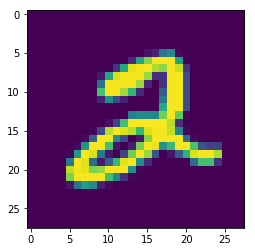

In [5]:
i = 5
plt.imshow(x_train[i, 0], interpolation='nearest')
plt.show()

In [6]:
##define model
#TODO -- play around with this

model = Sequential()

##input layer
model.add(Convolution2D(nb_filters, nb_conv, nb_conv, 
                       border_mode='valid', 
                       input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
#convolutional layer
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
#convolutional layer
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [7]:
#take validation data from training set automatically
#use validation_data=(x_test, y_test) for explicit setting fo validation data
model.fit(x_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
         verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 21s - loss: 0.4214 - acc: 0.8701 - val_loss: 0.1138 - val_acc: 0.9678

KeyboardInterrupt: 

In [8]:
score = model.evaluate(x_test, y_test, verbose=1)
print 'test score={}'.format(score[0])
print 'test accuracy={}'.format(score[1])
print
print model.predict_classes(x_test[:10])
print y_test[:10]

 9920/10000 [============================>.] - ETA: 0s

In [4]:
import numpy

A = []
B = []

for j in range(100):
    npa = numpy.array([[1 for j in range(100)] for i in range(100)])
    A.append(npa.reshape(1,npa.shape[0],npa.shape[1]))

for j in range(100):
    npa = numpy.array([[0 for j in range(100)] for i in range(100)])
    B.append(npa.reshape(1,npa.shape[0],npa.shape[1]))

trainXA = []
trainXB = []
testXA = []
testXB = []

for j in range(len(A)):
    if ((j+2) % 7) != 0:
        trainXA.append(A[j])
        trainXB.append(B[j])
    else:
        testXA.append(A[j])
        testXB.append(B[j])

X_train = numpy.array(trainXA + trainXB)
X_test = numpy.array(testXA + testXB)

Y_train = numpy.array([[1,0] for i in range(len(X_train)/2)] + [[0,1] for i in range(len(X_train)/2)])

import random

def jumblelists(C,D):
    outC = []
    outD = []
    for j in range(len(C)):
        newpos = int(random.random()*(len(outC)+1))
        outC = outC[:newpos]+[C[j]]+outC[newpos:]
        outD = outD[:newpos]+[D[j]]+outD[newpos:]
    return numpy.array(outC),numpy.array(outD)

X_train,Y_train = jumblelists(X_train,Y_train)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import SGD

model = Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1,100,100)))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

sgd = SGD(lr=1e-4, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10)

Epoch 1/10
172/172 [==============================] - 1s - loss: 0.6472 - acc: 0.7645     
Epoch 2/10
172/172 [==============================] - 1s - loss: 0.5158 - acc: 1.0000     
Epoch 3/10
172/172 [========